### Simplistic Model of Justice Sytem

![alt text](ModelPicture.png "Title")

In [1]:
#!pip install simpy

In [2]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class JusticeSystem():
    def __init__(self, env) -> None:
        self.env = env

        # Random, hard-coded probability
        self.summoned_dismiss_prob = 0.01
        self.magistrate_dismiss_prob = 0.08
        self.magistrate_sentence_prob = 0.7 # This is after not dismissing. I.e., of all the legitimate cases, 30% is forwarded
        self.crown_dismiss_prob = 0.01

        # list for logging
        self.dismissed_list = []
        self.sentenced_list = []

    # The entire justice process
    def justice(self, env):
        while True:
            # Track case progress
            self.summoned_case = True
            self.magistrate_case = False
            self.crown_case = False
            self.sentenced = False

            # Start date
            start_date = env.now

            # Case start
            if self.summoned_case:
                yield self.env.process(self.summoned())

            if self.magistrate_case:
                yield self.env.process(self.magistrate()) 
            
            if self.crown_case:
                yield self.env.process(self.crown())
            
            # End date
            end_date = env.now

            # Logging
            # print(f'Our case takes {end_date - start_date} days') #Uncomment if you want to see a lot of cases flying by
            if self.sentenced:
                self.sentenced_list.append(end_date - start_date)
            else:
                self.dismissed_list.append(end_date - start_date)


    # The summoned process
    def summoned(self):
        # Case dismissed
        if np.random.uniform() < self.summoned_dismiss_prob:
            self.summoned_case = False
            yield self.env.timeout(
                max(1, round(np.random.normal(34, 5)))
            )
        
        # Case moved to magistrate
        else:
            self.summoned_case = False
            self.magistrate_case = True
            yield self.env.timeout(
                max(1, round(np.random.normal(34, 5)))
            ) 

    # The magistrate process
    def magistrate(self):
        # Cases dismissed
        if np.random.uniform() < self.magistrate_dismiss_prob:
            self.magistrate_case = False
            yield self.env.timeout(
                max(1, round(np.random.normal(9, 3)))
            )  

        # Cases sentenced
        elif np.random.uniform() < self.magistrate_sentence_prob:
            self.magistrate_case = False
            self.sentenced = True
            yield self.env.timeout(
                max(1, round(np.random.normal(9, 3)))
            )*

        # Cases moved to crown court
        else:
            self.magistrate_case = False
            self.crown_case = True
            yield self.env.timeout(0)

    # the crown process
    def crown(self):
        # Cases dismissed
        if np.random.uniform() < self.crown_dismiss_prob:
            self.crown_case = False
            yield self.env.timeout(
                            max(1, round(np.random.normal(160, 50)))
                        )

        # Cases sentenced
        else:
            self.crown_case = False
            self.sentenced = True
            yield self.env.timeout(
                            max(1, round(np.random.normal(160, 50)))
                        )


In [4]:
def simulate(env):
    global justice_system
    justice_system = JusticeSystem(env)
    env.process(justice_system.justice(env))
    
    yield env.timeout(0)

In [5]:
env = simpy.Environment()
env.process(simulate(env))
env.run(until=40000000)

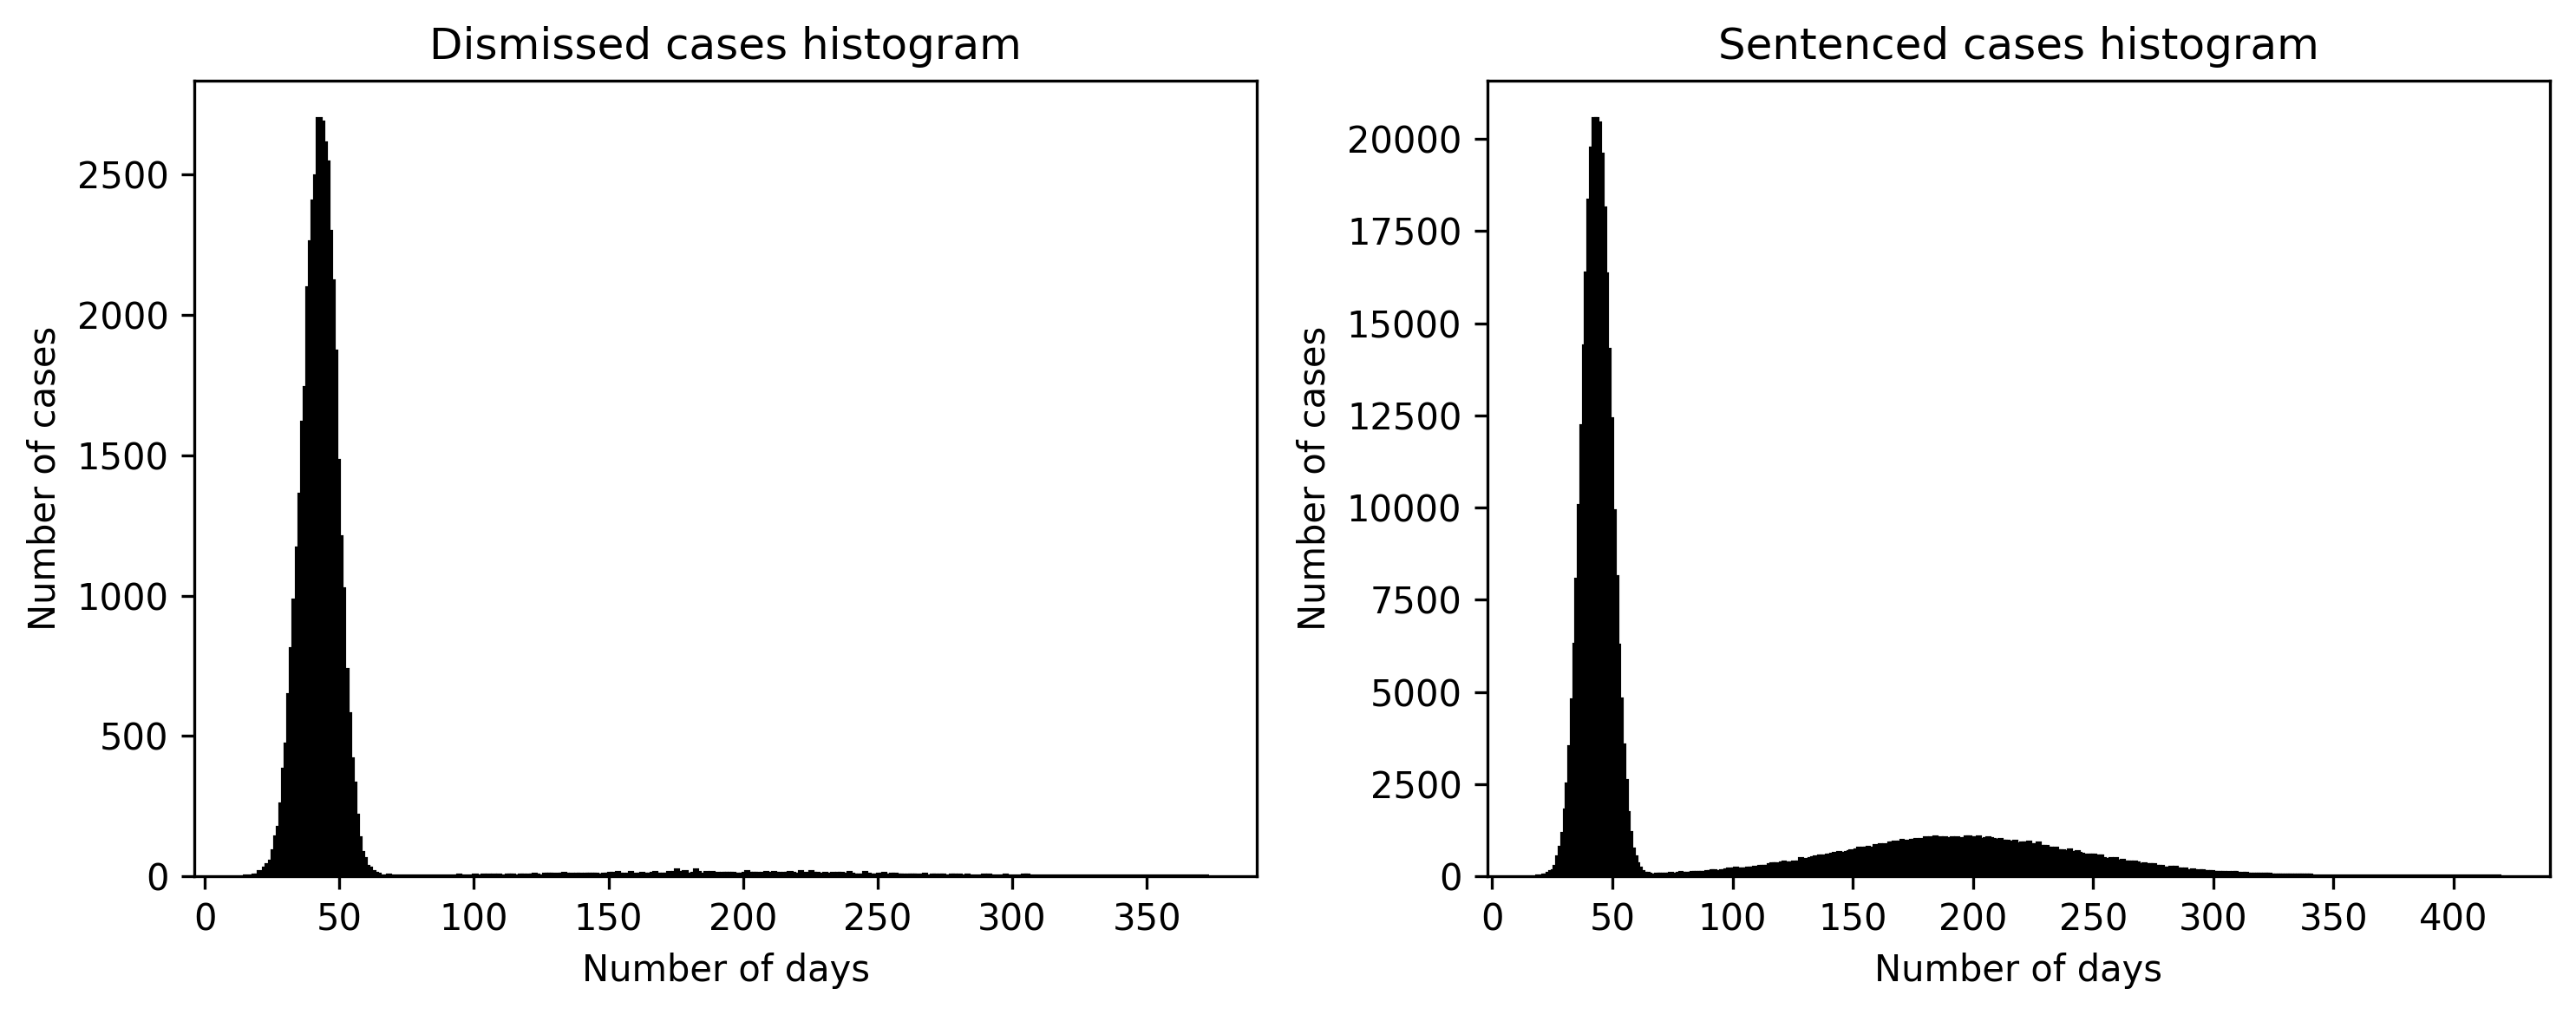

In [6]:
plt.rcParams['figure.dpi'] = 300

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first histogram
axs[0].hist(justice_system.dismissed_list, bins=range(min(justice_system.dismissed_list), max(justice_system.dismissed_list) + 1), edgecolor='black')
axs[0].set_title('Dismissed cases histogram')
axs[0].set_xlabel('Number of days')
axs[0].set_ylabel('Number of cases')

# Plot the second histogram
axs[1].hist(justice_system.sentenced_list, bins=range(min(justice_system.sentenced_list), max(justice_system.sentenced_list) + 1), edgecolor='black')
axs[1].set_title('Sentenced cases histogram')
axs[1].set_xlabel('Number of days')
axs[1].set_ylabel('Number of cases')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Display the plot
plt.show()

In [7]:
len(justice_system.dismissed_list) + len(justice_system.sentenced_list) 

475242